In [9]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [10]:
#training data from https://github.com/IdleHandsProject/makennbot
x_train = [
  [ 0.0, 0.0, 0.0, 0.0, 0.0],
  [ 1.0, 1.0, 1.0, 1.0, 1.0],
  [ 0.0, 0.0, 1.0, 0.0, 0.0],
  [ 0.0, 1.0, 1.0, 1.0, 0.0],
  [ 0.5, 0.5, 0.5, 0.5, 0.5],
  [ 0.0, 0.0, 0.5, 0.0, 0.0],
]
y_train = [
  [ 1.0, 1.0],
  [ 0.0, 0.0],
  [ 0.6, 0.7],
  [ 0.8, 0.2],
  [ 0.6, 0.6],
  [ 0.5, 0.6],
]

x_train = np.array(x_train)
y_train = np.array(y_train)

In [11]:
model = Sequential()

IN = x_train.shape[1]
HIDDEN = IN + 1
OUT = y_train.shape[1]

model.add(Dense(units=HIDDEN, activation='sigmoid', input_dim=IN, dtype='float16'))
model.add(Dense(units=OUT, activation='sigmoid', dtype='float16'))

model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(learning_rate=0.4))

In [12]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

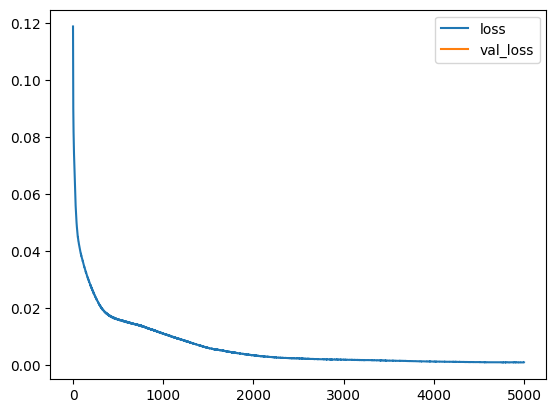

In [13]:
model.fit(x_train, y_train, epochs=5000, batch_size=1, verbose=False, callbacks=[plot_losses])

In [14]:
preds = model.predict(x_train).tolist()
for i, pred in enumerate(preds):
    print('model:\t', np.round(pred,2))
    print('label:\t', y_train[i])
    print(' ')

1/1 [==============================] - 0s 177ms/step
model:	 [0.97 0.96]
label:	 [1. 1.]
 
model:	 [0.05 0.05]
label:	 [0. 0.]
 
model:	 [0.57 0.67]
label:	 [0.6 0.7]
 
model:	 [0.79 0.2 ]
label:	 [0.8 0.2]
 
model:	 [0.59 0.58]
label:	 [0.6 0.6]
 
model:	 [0.54 0.64]
label:	 [0.5 0.6]
 


In [15]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '').replace(']', '\n').replace(',', '\nlong ')
    return 'f'+name+'\nlong ' + s + 'fEnd'+name

In [16]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in spin2 code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in spin2 code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


fHiddenWeights
long -0.771484375
long  1.359375
long  0.45068359375
long  -1.74609375
long  -0.356201171875
long  -1.220703125

long  0.169189453125
long  -0.26416015625
long  -1.35546875
long  -1.21484375
long  0.54443359375
long  -0.65869140625

long  1.189453125
long  -1.05078125
long  -0.397216796875
long  7.68359375
long  -0.4580078125
long  0.9111328125

long  1.0556640625
long  -0.1793212890625
long  -1.04296875
long  -1.57421875
long  0.99951171875
long  -0.0469970703125

long  -4.0
long  1.81640625
long  0.755859375
long  -1.22265625
long  -0.415771484375
long  -0.68701171875

long  1.3857421875
long  -1.1259765625
long  2.0
long  -1.197265625
long  -0.0611572265625
long  1.220703125

fEndHiddenWeights
fOutputWeights
long 4.00390625
long  2.462890625

long  -3.546875
long  -2.0

long  -1.044921875
long  